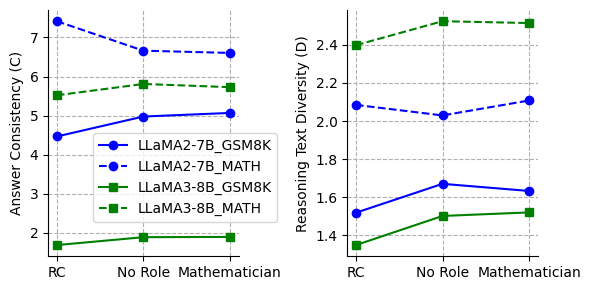

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['LLaMA2-7B', 'LLaMA3-8B']
tasks = ['GSM8K', 'MATH']
roles = ['RC', 'No Role', 'Mathematician']

data = {
    'LLaMA2-7B_GSM8K': {
        'RC': {'sc_count_average': 4.4655, 'sc_diversity_average': 1.5182},
        'No Role': {'sc_count_average': 4.9765, 'sc_diversity_average': 1.6699},
        'Mathematician': {'sc_count_average': 5.0682, 'sc_diversity_average': 1.6324}
    },
    'LLaMA3-8B_GSM8K': {
        'RC': {'sc_count_average': 1.6854, 'sc_diversity_average': 1.3480},
        'No Role': {'sc_count_average': 1.8877937831690674, 'sc_diversity_average': 1.5011114480667171},
        'Mathematician': {'sc_count_average': 1.8946171341925702, 'sc_diversity_average': 1.5197255496588322}
    },
    'LLaMA2-7B_MATH': {
        'RC': {'sc_count_average': 7.4168, 'sc_diversity_average': 2.0848},
        'No Role': {'sc_count_average': 6.662, 'sc_diversity_average': 2.029426}, 
        'Mathematician': {'sc_count_average': 6.604417670682731, 'sc_diversity_average': 2.10790562248996}
    },
    'LLaMA3-8B_MATH': {
        'RC': {'sc_count_average': 5.5200, 'sc_diversity_average': 2.3986},
        'No Role': {'sc_count_average': 5.8100, 'sc_diversity_average': 2.5247},
        'Mathematician': {'sc_count_average': 5.7280, 'sc_diversity_average': 2.5150}
    }
}

model_styles = {
    'LLaMA2-7B': {'color': 'blue', 'marker': 'o'},
    'LLaMA3-8B': {'color': 'green', 'marker': 's'}
}

line_styles = {
    'GSM8K': 'solid',
    'MATH': 'dashed'
}

# Plot with a single legend for both plots
fig, axes = plt.subplots(1, 2, figsize=(6, 3))  # Change to 1 row, 2 columns

# Subplot 1: sc_count_average
for model in models:
    for task in tasks:
        label = f"{model}_{task}"
        count_averages = [data[label][role]['sc_count_average'] for role in roles]
        axes[0].plot(
            roles, 
            count_averages, 
            marker=model_styles[model]['marker'], 
            linestyle=line_styles[task], 
            color=model_styles[model]['color'], 
            label=label
        )

axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
# axes[0].set_xticklabels([])  # Remove x-axis labels
axes[0].set_ylabel('Answer Consistency (C)')
axes[0].grid(True, linestyle='--')
axes[0].legend(bbox_to_anchor=(0.2, 0.32))

# Subplot 2: sc_diversity_average
for model in models:
    for task in tasks:
        label = f"{model}_{task}"
        diversity_averages = [data[label][role]['sc_diversity_average'] for role in roles]
        axes[1].plot(
            roles, 
            diversity_averages, 
            marker=model_styles[model]['marker'], 
            linestyle=line_styles[task], 
            color=model_styles[model]['color']
        )

axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].set_ylabel('Reasoning Text Diversity (D)')
axes[1].grid(True, linestyle='--')

# Add a single legend to the first subplot
# axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
